# Practical works TSIA202a of Dakhlaoui Rayane and Chgour Adam

In [1]:
#Bibliothèques:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy 
import librosa
import soundfile as sf
import scipy
from scipy.linalg import toeplitz
import math
from collections import defaultdict
from tqdm import tqdm
from IPython.display import HTML

---

# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version.

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





----
## Question 1

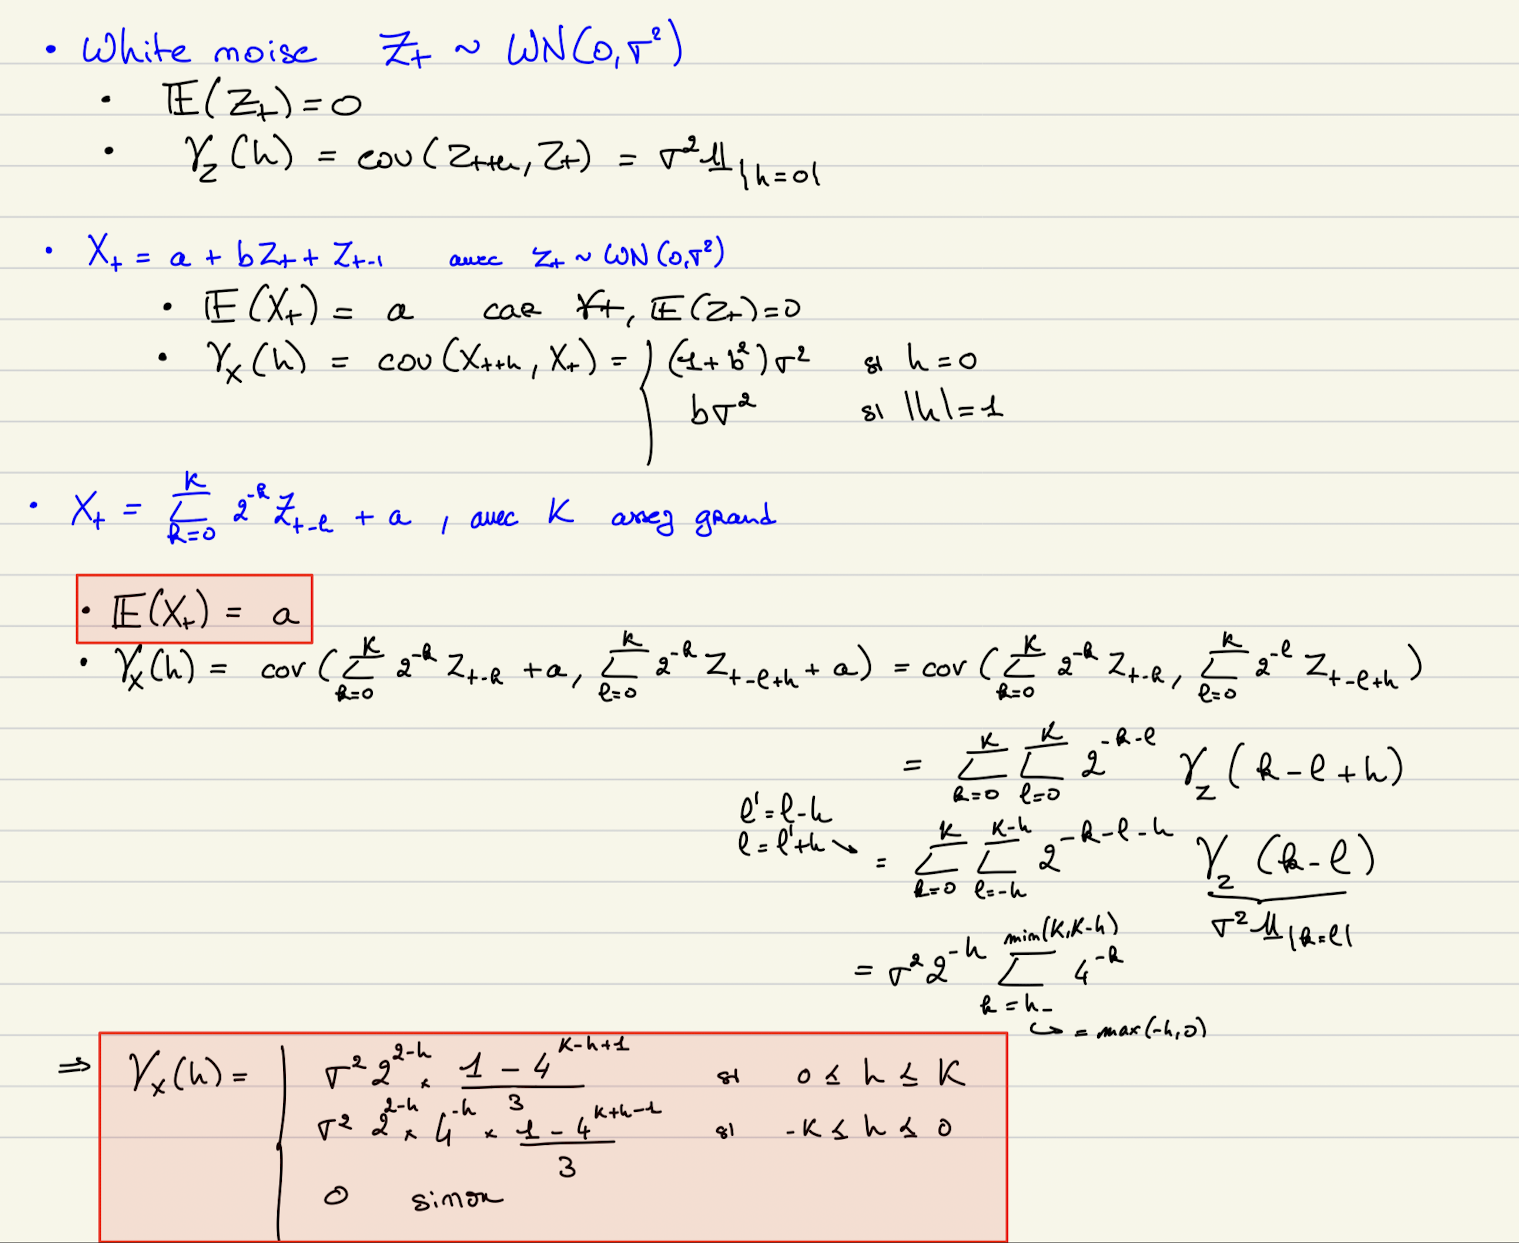
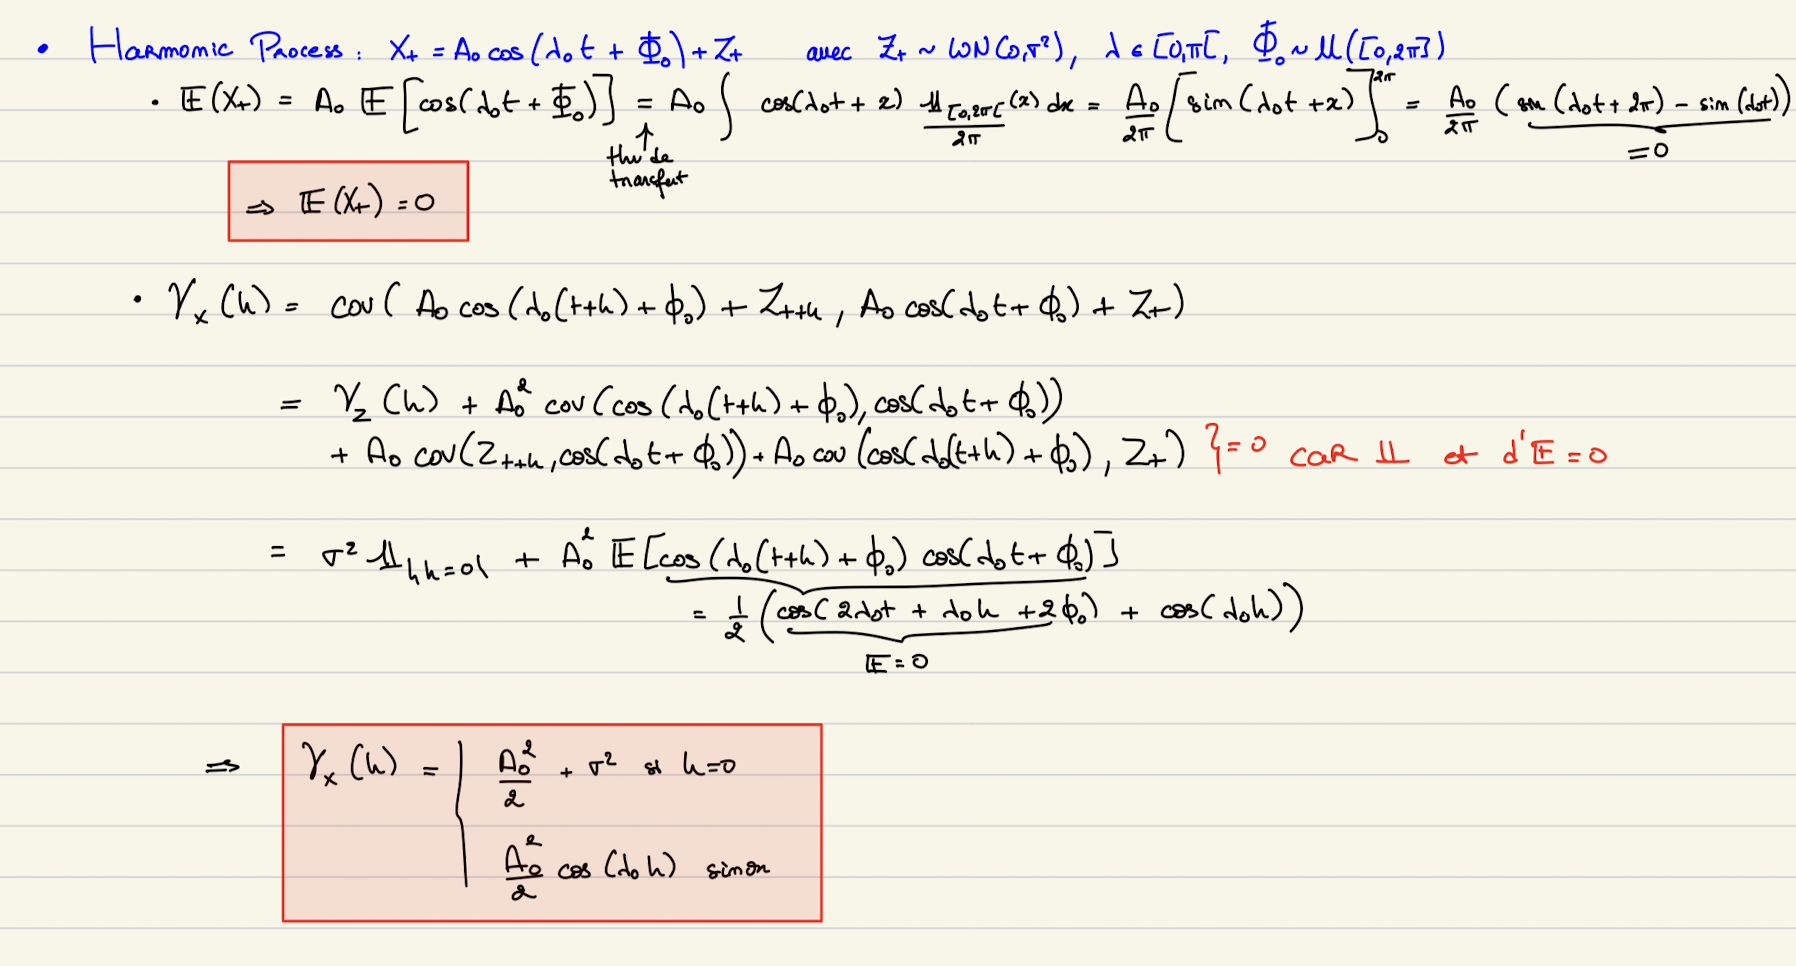

----
## Question 2 & 3
### Nous allons, pour chaque processus, implémenter et calculer les moyennes empiriques et théoriques afin de comparer leurs valeurs pour N échantillons.

On définit une fonction `autocov_emp` qui calcule $\hat{\gamma}(h)$ et une fonction `mean_emp` qui calcule la moyenne empirique.

In [2]:
#Fonctions empiriques:
def mean_emp(L):
  return 1/len(L)*np.sum(L)

def autocov_emp(X_t, h):
  N = len(X_t)
  X_bar = np.mean(X_t)
  return np.mean((X_t[:N-h] - X_bar) * (X_t[h:] - X_bar))

#### 1. Bruit blanc

Moyenne théorique du Bruit Blanc :  0
Moyenne empirique du Bruit Blanc :  -0.005415654837506492
Variance théorique du Bruit Blanc :  1
Variance empirique du Bruit Blanc :  1.0302458215255739


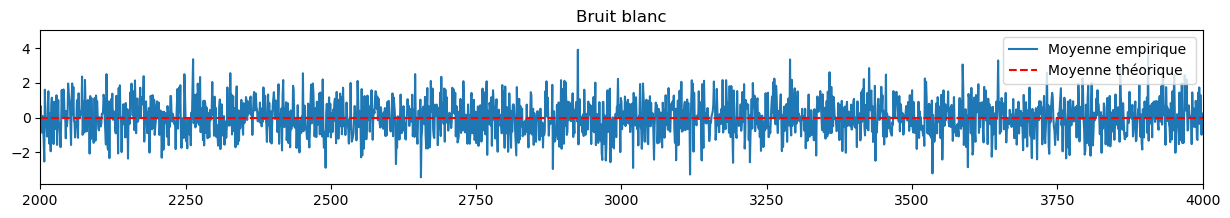

In [3]:
N = 5000
sigma2 = 1
WN = np.random.normal(0, sigma2, N)
print("Moyenne théorique du Bruit Blanc : ", 0)
print("Moyenne empirique du Bruit Blanc : ", mean_emp(WN))

print("Variance théorique du Bruit Blanc : ", sigma2)
print("Variance empirique du Bruit Blanc : ", autocov_emp(WN,0))

fig = plt.figure(figsize=(15, 2))
plt.plot(WN, label='Moyenne empirique ')
plt.axhline(0, color='red', linestyle='--', label='Moyenne théorique')
plt.title('Bruit blanc')
plt.xlim(2000,4000)
plt.legend()
plt.show()

#### Deuxième process

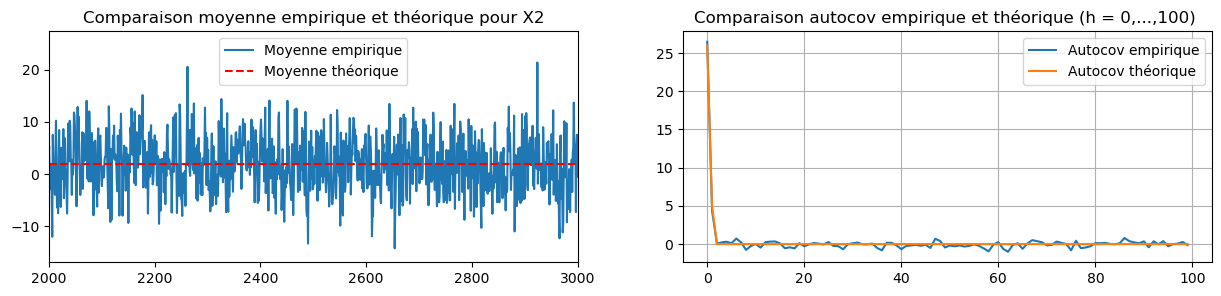

In [4]:
#Paramètres 
N = 5000
sigma2 = 1
a = 2
b = 5

#Process
X2 = [a + b*WN[t] + WN[t-1] for t in range(1,N)]

#Moyenne et fonction d'autocovariance empirique de X2
theoretical_mean_X2 = a

def theoretical_autocov_X2(b, sigma2, h):
    if h == 0:
        return sigma2 * (1 + b**2)
    elif np.abs(h) == 1:
        return b * sigma2
    else:
        return 0

# Plot
fig = plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(X2, label='Moyenne empirique')
plt.axhline(theoretical_mean_X2, color='red', linestyle='--', label='Moyenne théorique')
plt.title('Comparaison moyenne empirique et théorique pour X2')
plt.xlim(2000,3000)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([autocov_emp(X2,t) for t in range(0,100)], label='Autocov empirique')
plt.plot([theoretical_autocov_X2(b, sigma2, t) for t in range(0,100)], label='Autocov théorique')
plt.title('Comparaison autocov empirique et théorique (h = 0,...,100) ')
plt.legend()
plt.grid(True)

#### Troisième process

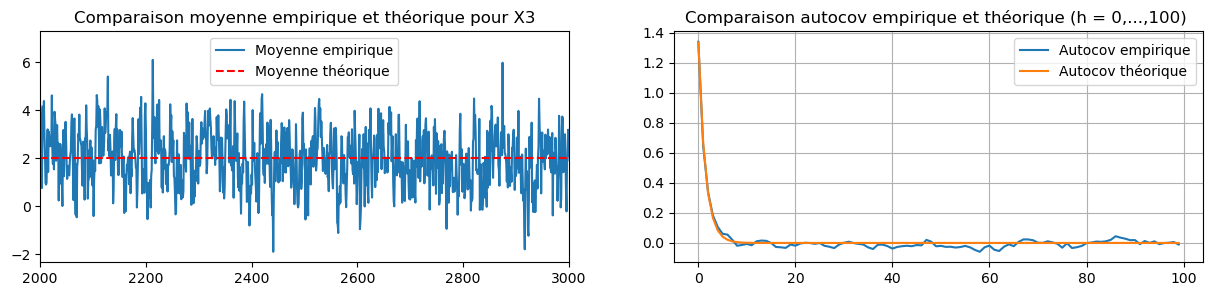

In [5]:
#Paramètres 
N = 5000
sigma2 = 1
a = 2
K = 50

#Process
X3 = [a+np.sum([WN[t-k]*(2**(-k)) for k in range(0,K+1)]) for t in range(K,N)]

#Moyenne et fonction d'autocovariance empirique de X3
theoretical_mean_X3 = a

def theoretical_autocov_X3(K, sigma2, h):
    if h <= K:
        return ((4/3)*sigma2)*((1/2)**h)*(1-(1/4)**(K-h+1))
    else:
        return 0
        
# Plot
fig = plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(X3, label='Moyenne empirique')
plt.axhline(theoretical_mean_X3, color='red', linestyle='--', label='Moyenne théorique')
plt.title('Comparaison moyenne empirique et théorique pour X3')
plt.xlim(2000,3000)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([autocov_emp(X3,t) for t in range(0,100)], label='Autocov empirique')
plt.plot([theoretical_autocov_X3(K, sigma2, t) for t in range(0,100)], label='Autocov théorique')
plt.title('Comparaison autocov empirique et théorique (h = 0,...,100) ')
plt.legend()
plt.grid(True)

#### Quatrième process

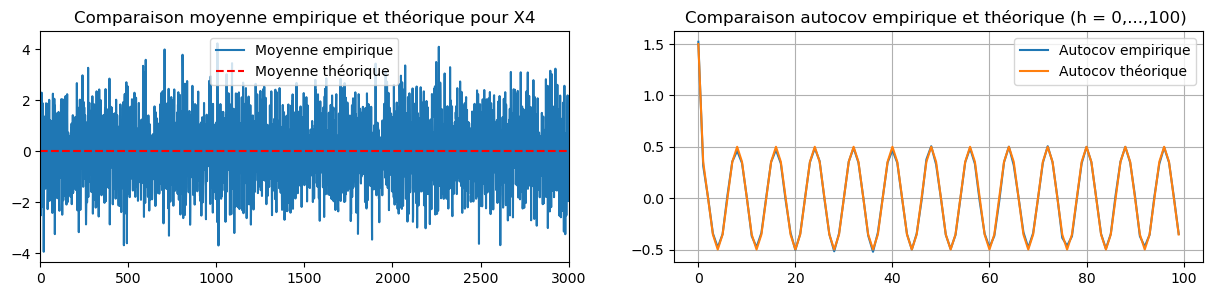

In [6]:
#Paramètres 
N = 5000
sigma2 = 1
A0 = 1
lambda0 = np.pi / 4
K = 50
Phi0 = np.random.uniform(0, 2 * np.pi)

#Process
X4 = [(A0 * np.cos(lambda0*t + Phi0) + WN[t]) for t in range(N)]

#Moyenne et fonction d'autocovariance empirique de X4
theoretical_mean_X4 = 0

def theoretical_autocov_X4(h):
    if h == 0:
        return (A0**2) / 2 + sigma2
    else:
        return (A0**2 / 2) * np.cos(lambda0 * h) 

        
# Plot
fig = plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(X4, label='Moyenne empirique')
plt.axhline(theoretical_mean_X4, color='red', linestyle='--', label='Moyenne théorique')
plt.title('Comparaison moyenne empirique et théorique pour X4')
plt.xlim(0,3000)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([autocov_emp(X4,t) for t in range(0,100)], label='Autocov empirique')
plt.plot([theoretical_autocov_X4(t) for t in range(0,100)], label='Autocov théorique')
plt.title('Comparaison autocov empirique et théorique (h = 0,...,100) ')
plt.legend()
plt.grid(True)

### Conclusion
Pour les quatre processus, moyenne empirique et moyenne théorique sont assez proche, cependant on voit que plus le nombre d'échantillons est grand, plus on est précis.
Pour les autocovariances, les courbes théoriques et empiriques sont elles encore plus proches pour les trois processus X2, X3 et X4.

----
## Question 4

For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.



/var/folders/21/2t2dfjlx0_9046yb33sx1py00000gn/T/ipykernel_12356/1408191835.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([MSE_X2 for T in T_values], labels=T_values)
/var/folders/21/2t2dfjlx0_9046yb33sx1py00000gn/T/ipykernel_12356/1408191835.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([MSE_X3 for T in T_values], labels=T_values)
/var/folders/21/2t2dfjlx0_9046yb33sx1py00000gn/T/ipykernel_12356/1408191835.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([MSE_X4 for T in T_values], labels=T_values)


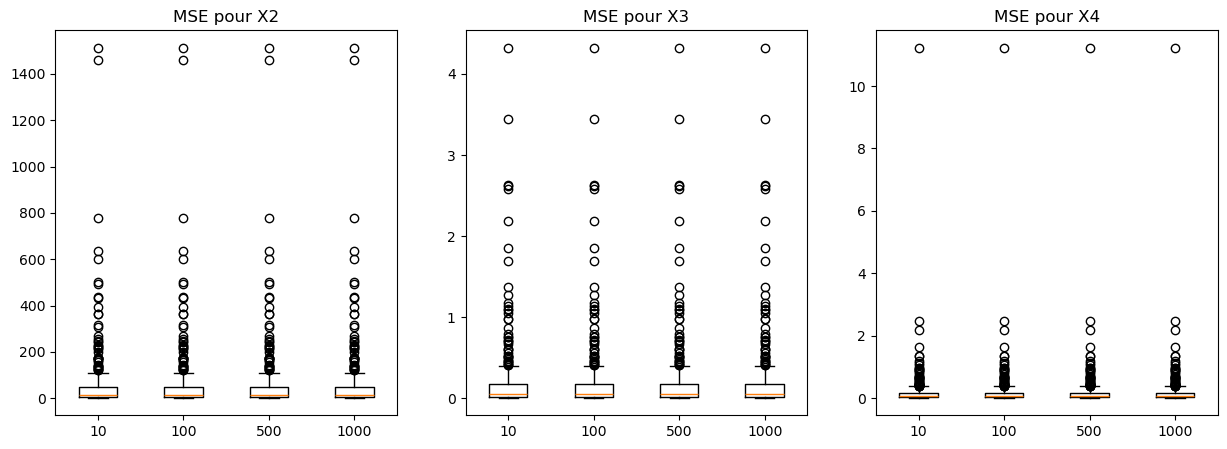

In [7]:
# Paramètres 
N = 5000
sigma2 = 1
a = 2
b = 5
A0 = 1
lambda0 = np.pi / 4
K = 50
Phi0 = np.random.uniform(0, 2 * np.pi)

# Génération des processus
def generate_processes(WN):
    X2 = [a + b * WN[t] + WN[t-1] for t in range(1, N)]
    X3 = [a + np.sum([WN[t-k] * (2**(-k)) for k in range(0, K+1)]) for t in range(K, N)]
    X4 = [(A0 * np.cos(lambda0 * t + Phi0) + WN[t]) for t in range(N)]
    return X2, X3, X4

# Calcul de la MSE
def calculate_mse(emp_cov, theo_cov):
    return np.mean([(emp_cov[i] - theo_cov[i])**2 for i in range(len(emp_cov))])

# Boxplots pour différents T
def plot_mse(T_values):
    MSE_X2, MSE_X3, MSE_X4 = [], [], []

    for _ in range(100):  # 100 tirages
        WN = np.random.normal(0, sigma2, N)
        X2, X3, X4 = generate_processes(WN)

        for T in T_values:
            # Covariances empiriques
            emp_cov_X2 = [autocov_emp(X2[:T], h) for h in range(T)]
            emp_cov_X3 = [autocov_emp(X3[:T], h) for h in range(T)]
            emp_cov_X4 = [autocov_emp(X4[:T], h) for h in range(T)]

            # Covariances théoriques
            theo_cov_X2 = [theoretical_autocov_X2(b, sigma2, h) for h in range(T)]
            theo_cov_X3 = [theoretical_autocov_X3(K, sigma2, h) for h in range(T)]
            theo_cov_X4 = [theoretical_autocov_X4(h) for h in range(T)]

            # Calcul des MSE
            MSE_X2.append(calculate_mse(emp_cov_X2, theo_cov_X2))
            MSE_X3.append(calculate_mse(emp_cov_X3, theo_cov_X3))
            MSE_X4.append(calculate_mse(emp_cov_X4, theo_cov_X4))

    # Affichage des boxplots
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.boxplot([MSE_X2 for T in T_values], labels=T_values)
    plt.title("MSE pour X2")

    plt.subplot(1, 3, 2)
    plt.boxplot([MSE_X3 for T in T_values], labels=T_values)
    plt.title("MSE pour X3")

    plt.subplot(1, 3, 3)
    plt.boxplot([MSE_X4 for T in T_values], labels=T_values)
    plt.title("MSE pour X4")

    plt.show()

# Exécution avec les valeurs de T
T_values = [10, 100, 500, 1000]
plot_mse(T_values)


---
---
---

# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{m-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation:
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$


----
### Question 1
$$
I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n}|\sum_{h=0}^{n-1} X_k e^{2i\pi\frac{kh}{m}}|^2 = \frac{1}{2\pi n}|\overline{\sum_{h=0}^{n-1} X_k e^{2i\pi\frac{kh}{m}}|}
^2 = \frac{1}{2\pi n}|\sum_{h=0}^{n-1} X_k e^{-2i\pi\frac{kh}{m}}|^2 = \frac{1}{2\pi n}|\sum_{h=0}^{m-1} X_k e^{-2i\pi\frac{kh}{m}}|^2 = \frac{1}{2\pi n} |DFT(X,m)(k)|^2
$$

Becuase the observations are real and we can extend the sum to $ k = m-1 $ because $ \forall k \in \{n,..., m-1 \}, X_{k}=0 $ (it's zero padding)


----

2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)



----
### Question 2

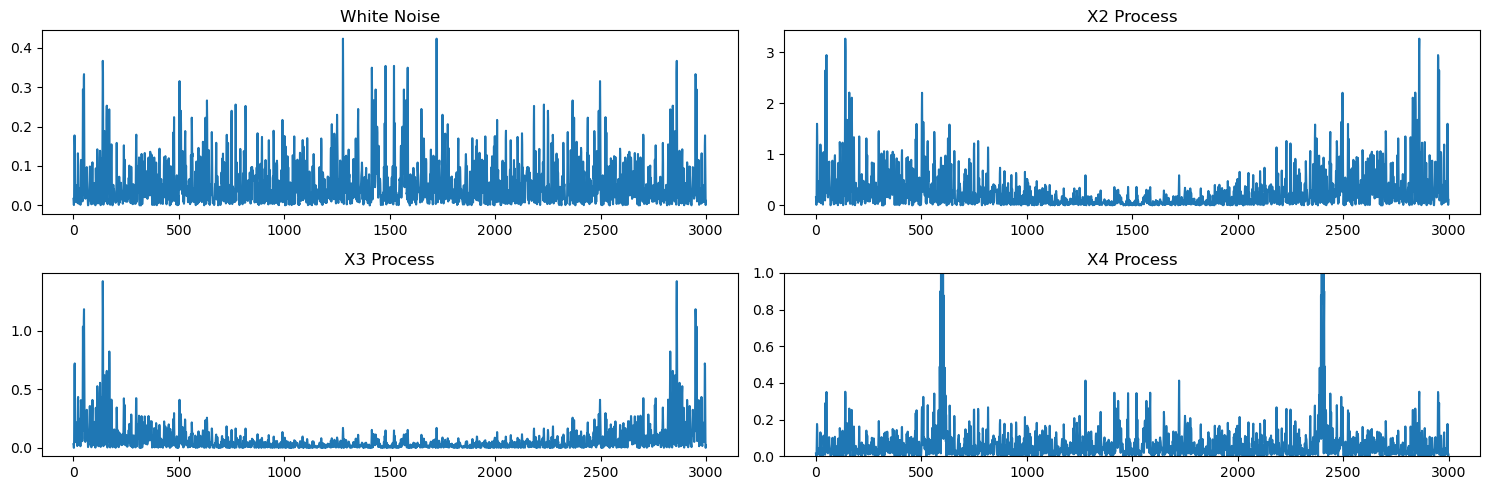

In [8]:
Params = { #On utilise ce dictionnaire pour enregistrer tous les paramètres de nos processus respectifs
    'sigma' : 1,
    'a' : 0,
    'b' : 2,
    'K' : 30,
    'ld' : np.random.uniform(0,np.pi),
    'Phi0' : np.random.uniform(0,2*np.pi),
    'A0' : 2,
}
N = 1000


WN = np.random.normal(0, Params['sigma'],N)
X2 = [Params['a'] + Params['b']*WN[t] + WN[t-1] for t in range(1,N)]
X3 = [Params['a']+np.sum([WN[t-k]*(2**(-k)) for k in range(0,Params['K']+1)]) for t in range(Params['K'],N)]
X4 = [(Params['A0']*np.cos(Params['ld']*t + Params['Phi0']) + WN[t]) for t in range(N)]

#Functions
M = 3*N
def periodogam(X,m):
    n = len(X)
    DFT_X = np.fft.fft(X,n=m)
    periodogram = (1/(2*np.pi*m))*np.abs(DFT_X)**2
    return periodogram
  
#Periodogrammes
I1 = periodogam(WN,M)
I2 = periodogam(X2,M)
I3 = periodogam(X3,M)
I4 = periodogam(X4,M)

fig =plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.plot(I1)
plt.title('White Noise')

plt.subplot(2,2,2)
plt.plot(I2)
plt.title('X2 Process')

plt.subplot(2,2,3)
plt.plot(I3)
plt.title('X3 Process')

plt.subplot(2,2,4)
plt.plot(I4)
plt.title('X4 Process')
plt.ylim(0,1)

plt.tight_layout()



----
### Question 3
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$

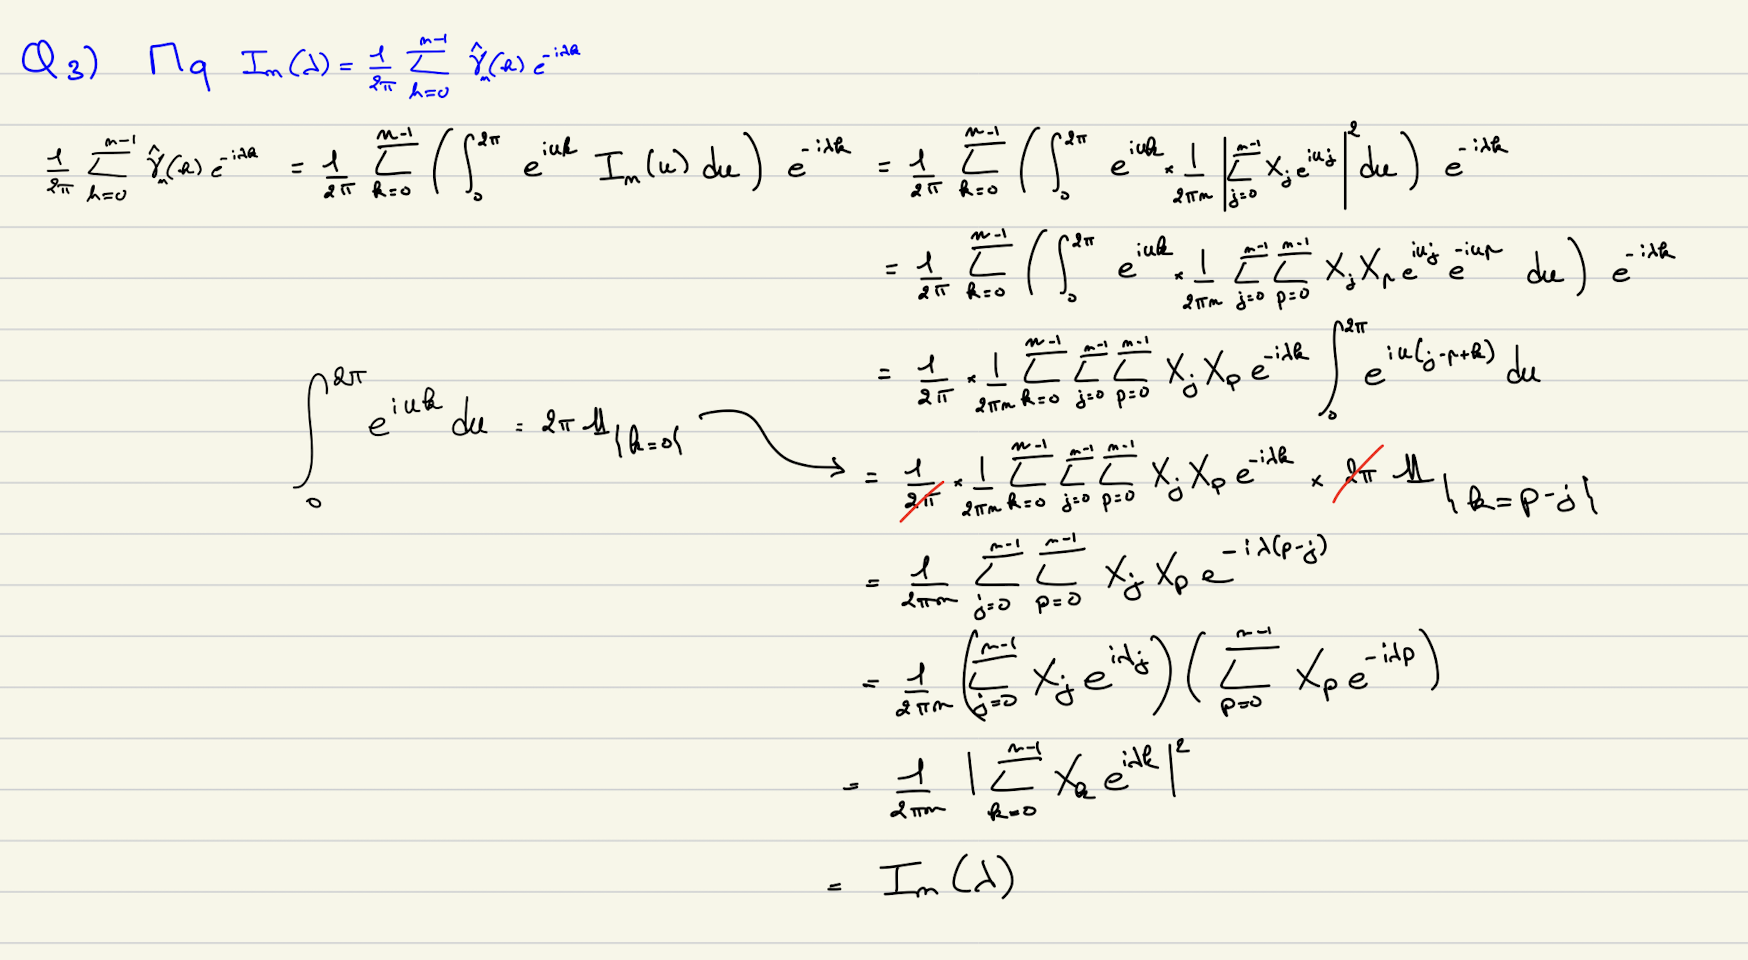

----
### Question 4
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

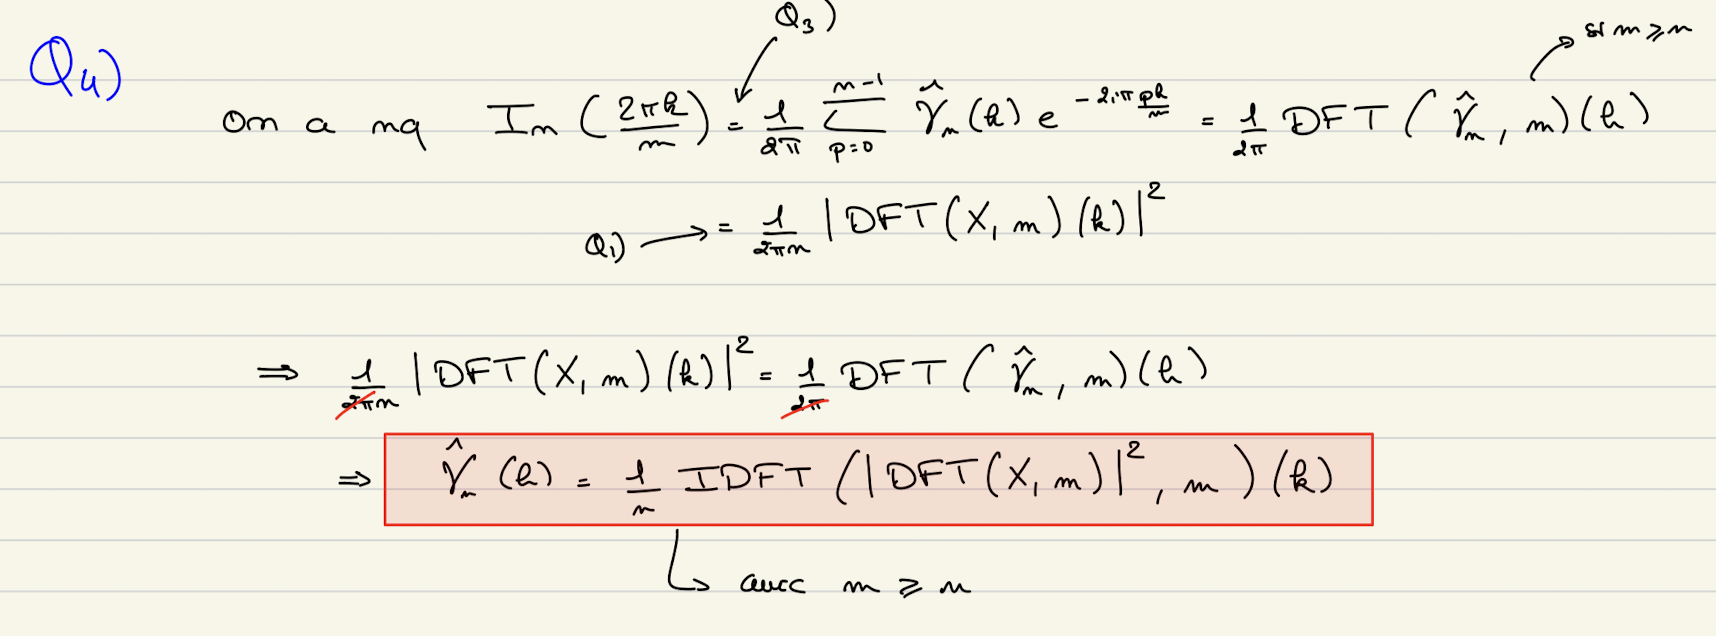


----
### Question 5
5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.


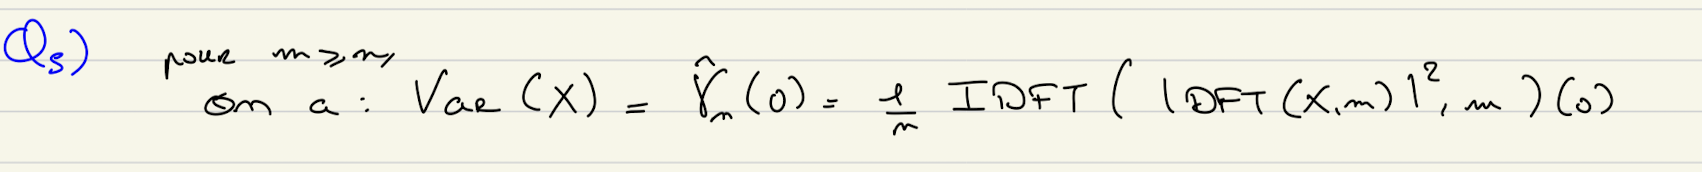

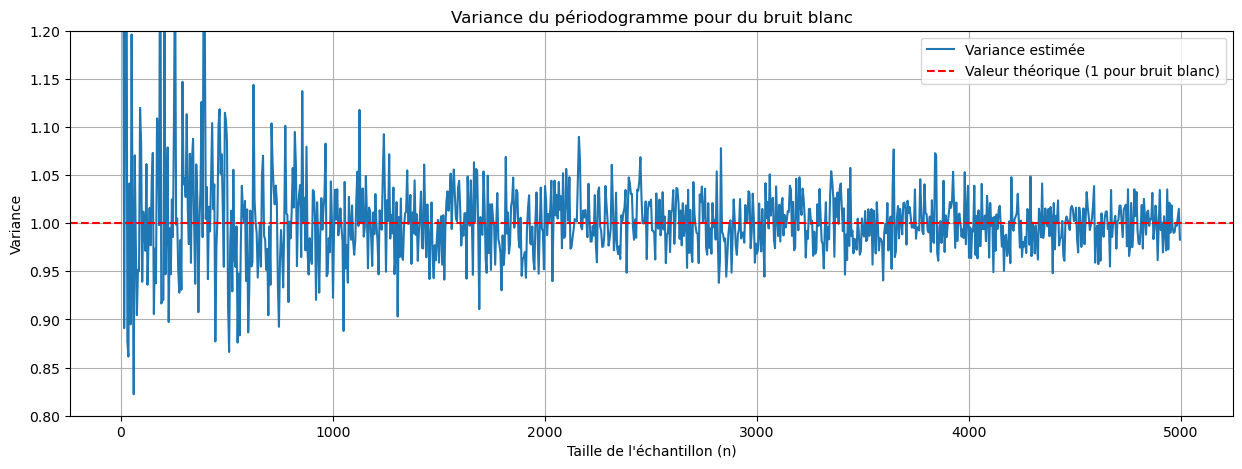

In [9]:
V = []
for i in range(10, 5000, 5):
    bruit_blanc = np.random.normal(0, 1, i)
    periodogram = np.abs(np.fft.fft(bruit_blanc, i))**2
    variance_estimee = (1 / i) * np.fft.ifft(periodogram)[0].real
    V.append(variance_estimee)

# Affichage des résultats
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(10, 5000, 5), V, label="Variance estimée")
plt.axhline(y=1, color='r', linestyle='--', label="Valeur théorique (1 pour bruit blanc)")
plt.title("Variance du périodogramme pour du bruit blanc")
plt.ylim(0.8, 1.2)
plt.xlabel("Taille de l'échantillon (n)")
plt.ylabel("Variance")
plt.legend()
plt.grid()
plt.show()


Ça converge bien vers $\sigma^2$ = 1

---
---
---

# TSIA202a - Third Practice Session

The goal of this third partical work is to use an AR(p) process to model a speech signal, and show that this approch is surprisingly powerful despite its simplicity.

The proposed synthesis algorithm divides into several steps.
1. Filter the audio signal to emphasize the highest frequencies (in order to flatten the spectrum and reduce precision issues with FFT computations).
2. Split the signal into several overlapping frames and iterate over them.
    1. Detect if the frame corresponds to noise or to a voiced signal, and estimate the fundamental frequency in the later case.
    2. Estimate the AR(p) coefficients using Yule-Walker equations.
    3. Re-synthetise the frame using the AR(p) coefficients, starting from a white noise in the case of a noisy frame, or a Dirac comb in the case of a voiced frame.
3. Overlap-add the synthesized frames with a Hanning window.
4. Filter the synthesised signal to de-emphasize the highest frequencies.

We propose to implement this algorithm in two parts. First, we will derive the Yule-Walker equations, and test them on synthetic data. Then, we will code the synthesis algorithm and apply it on a real world speech signal.


# 1. Yule-Walker equations

Let us consider a causal, zero-mean, AR(p) process defined by the following recurrent equation: 
$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p}
$$
where $\{Z_t , t \in \mathbb{Z}\}$ is a weak white noise with variance $\sigma^2$.

1. Show that, $\forall h \geq 1, \mathbb{E}[X_{t-h}Z_t]=0$.
2. Deduce a recurrent relation between $\gamma(h)$ and $\gamma(h-1),\gamma(h-2),\ldots,\gamma(h-p)$, for $h \geq 1$.
3. We consider separately the case $h=0$: find a new relationship between $\gamma(0)$ and $\gamma(-1),\gamma(-2),\ldots,\gamma(-p)$.
4. Put these relationships in matrix form:
\begin{equation}
\Gamma_{p+1}[1 \; -\phi_1 \; \ldots \; -\phi_p]^T = [\sigma_2 \; 0 \; \ldots \; 0]^T 
\end{equation}
where $\Gamma_{p+1}$ is a suitable Toeplitz matrix that you have to determine.

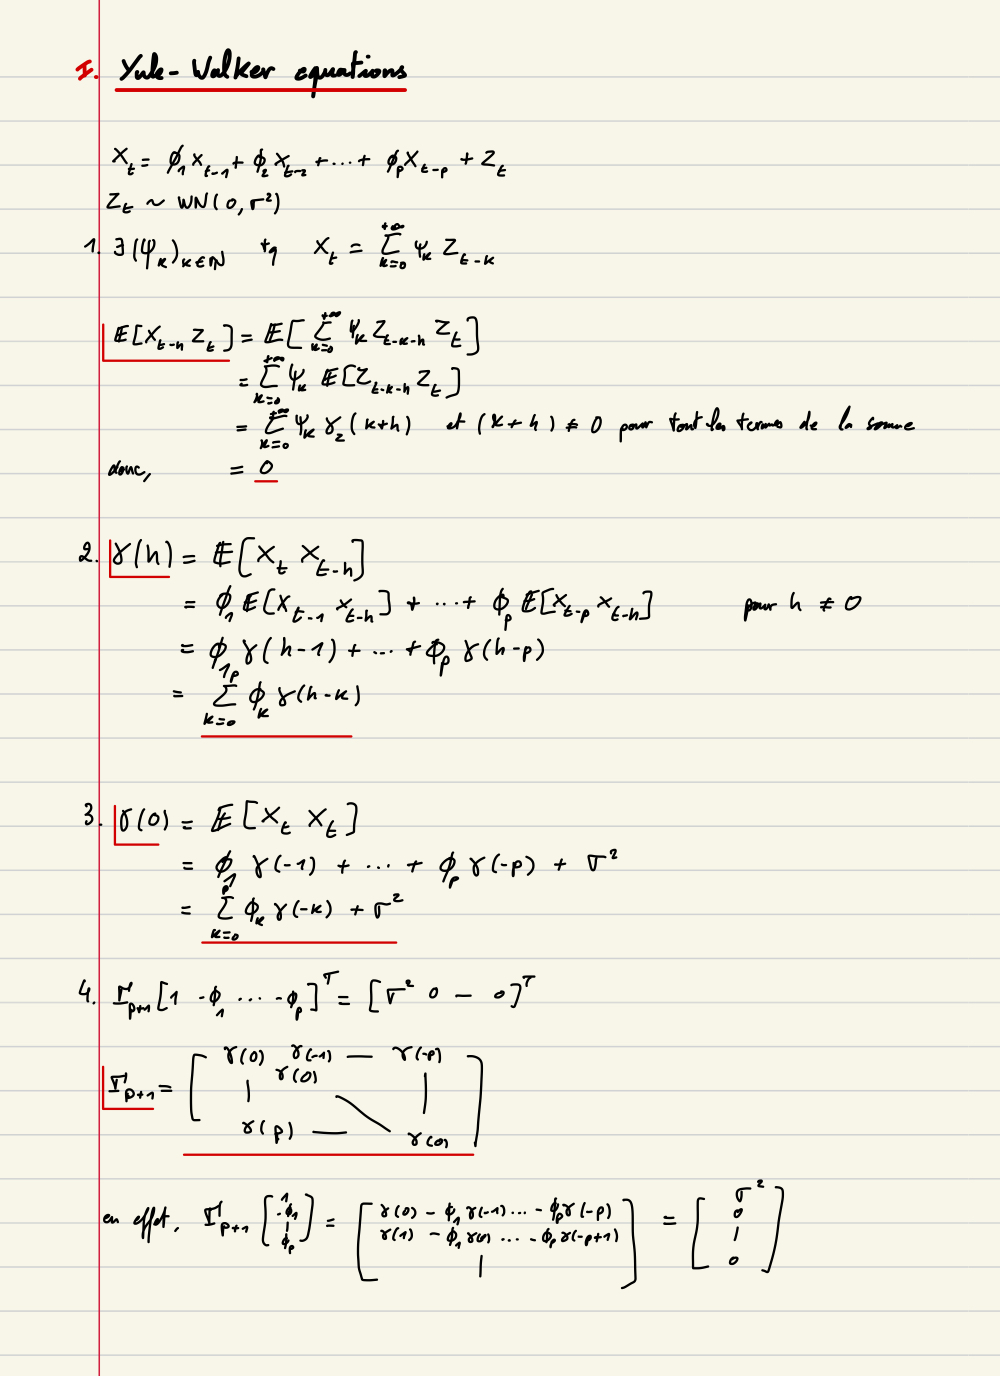

# 2. Evaluation on synthetic data

We will now evaluate equation $(1)$ on a synthetically generated AR(p) process.

1. Generate n=1000 samples of an AR(4) process.
2. Estimate $\Gamma_{p+1}$ using these samples.
3. Use equation $(1)$ to estimate $\sigma^2$ and the coefficients $\phi_1,\phi_2,\ldots,\phi_p$. Compute the relative error between the estimated and the true coefficients.
4. Estimate power spectral distribution of the synthesized signal. Compare with the theoretical distribution obtained from the poles of $1/\Phi(z^{-1})$.


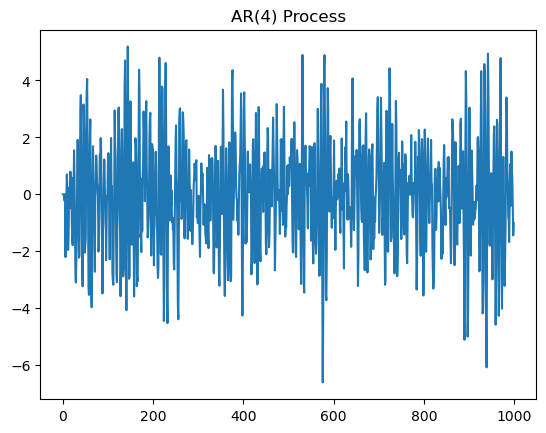

Mean of the Process: -0.01527312061161363
Estimated Gamma_{p+1} Matrix:
[[ 3.39300751  2.02015739 -0.24508638 -2.0469363  -1.98900944]
 [ 2.02015739  3.39300751  2.02015739 -0.24508638 -2.0469363 ]
 [-0.24508638  2.02015739  3.39300751  2.02015739 -0.24508638]
 [-2.0469363  -0.24508638  2.02015739  3.39300751  2.02015739]
 [-1.98900944 -2.0469363  -0.24508638  2.02015739  3.39300751]]


In [10]:
n = 1000
p = 4
phi = [0.8, -0.2, -0.5, 0.2]
sigma = 1
Z = np.random.normal(0, sigma, n)
X = [0]*p


for i in range(p, n):
    X.append(sum(phi[j] * X[i - j - 1] for j in range(p)) + Z[i])

ar_process = [sum(phi[j] * X[i - j - 1] for j in range(p)) + Z[i] for i in range(p, n)]

Gamma_p1 = np.zeros((p + 1, p + 1))
def gamma(h):
    return np.sum((X[:n - h] - np.mean(X)) * (X[h:] - np.mean(X))) / n

for row in range(5):
    for col in range(5):
        Gamma_p1[row][col] = gamma(abs(row - col))

plt.plot(X)
plt.title("AR(4) Process")
plt.show()
print("Mean of the Process:", np.mean(X))
print("Estimated Gamma_{p+1} Matrix:")
print(Gamma_p1)

In [11]:
b = np.zeros(p + 1)
b[0] = 1

v = np.dot(np.linalg.inv(Gamma_p1), b)

est = -v[1:]
print("Estimated AR Coefficients:", est)

real_coeffs = np.concatenate(([1],phi))
est_coeffs = np.concatenate(([1],est))
erreur_phi = sum(abs(x - y) for x, y in zip(phi, est)) / sum(abs(y) for y in est) 
print('Erreur Relative :',erreur_phi)

Estimated AR Coefficients: [ 0.80927968 -0.22357144 -0.52900626  0.206081  ]
Erreur Relative : 0.03842803241921548


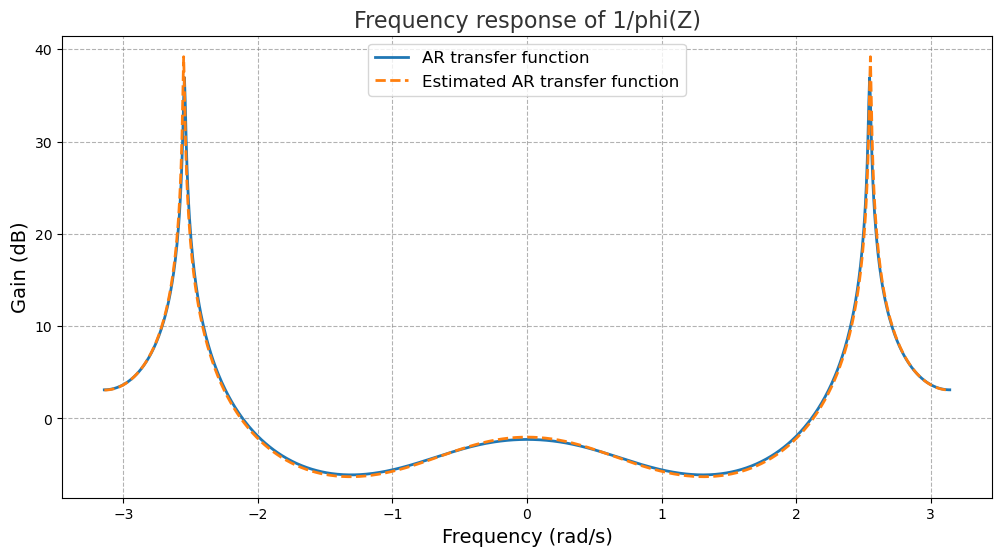

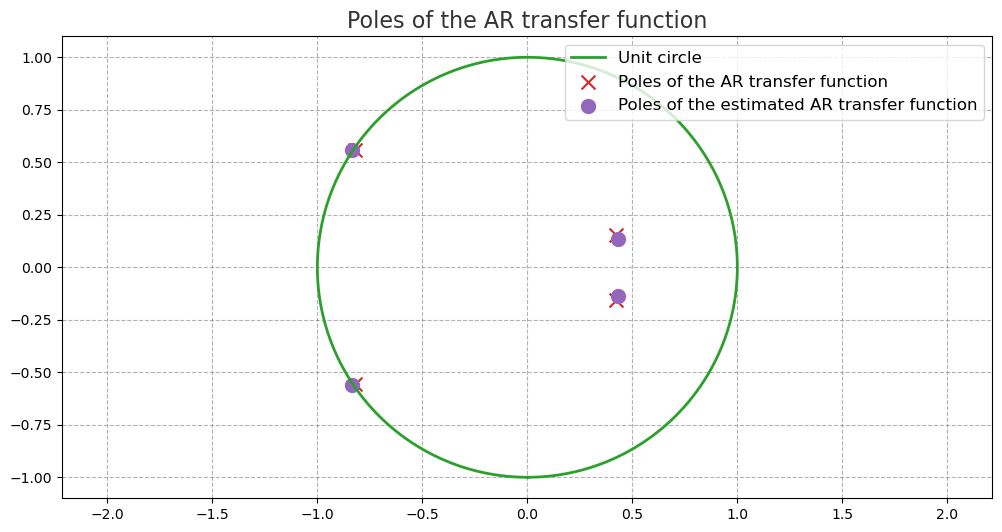

In [12]:
nPoints = int(np.exp2(np.ceil(np.log2(n))))
omega = np.linspace(-np.pi, np.pi, nPoints)

_, response = scipy.signal.freqz(1,real_coeffs, worN=omega)
_, response_est = scipy.signal.freqz(1,est_coeffs, worN=omega)

z = np.roots(real_coeffs)
z_est = np.roots(est_coeffs)

plt.figure(figsize=(12, 6))
plt.plot(omega, 20 * np.log10(np.abs(response)), color='#1f77b4', linestyle='-', linewidth=2, label='AR transfer function')  # Bleu vif
plt.plot(omega, 20 * np.log10(np.abs(response_est)), color='#ff7f0e', linestyle='--', linewidth=2, label='Estimated AR transfer function')  # Orange vif
plt.title('Frequency response of 1/phi(Z)', fontsize=16, color='#333333')
plt.xlabel('Frequency (rad/s)', fontsize=14)
plt.ylabel('Gain (dB)', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6, color='gray')
plt.show()

# Deuxième figure : Cercles unitaires et pôles
plt.figure(figsize=(12, 6))
t = np.linspace(-np.pi, np.pi, 1024)
plt.plot(np.sin(t), np.cos(t), color='#2ca02c', linestyle='-', linewidth=2, label='Unit circle')  # Vert vif
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.6, color='gray')

# Ajouter les pôles avec des couleurs et styles distincts
plt.scatter(np.real(z), np.imag(z), color='#d62728', marker='x', s=100, label='Poles of the AR transfer function')  # Rouge vif
plt.scatter(np.real(z_est), np.imag(z_est), color='#9467bd', marker='o', s=100, label='Poles of the estimated AR transfer function')  # Violet vif

plt.legend(loc='upper right', fontsize=12)
plt.title('Poles of the AR transfer function', fontsize=16, color='#333333')
plt.show()

# 3. Speech modeling

We will now implement the synthesis algorithm and evaluate it on a speech signal. 

A code template is provided below. We will use the file audio.wav to test the algorithm. 


LIsten to the original and synthesized signal by using any audio player. Try to modify the pitch of the synthesised signal and listen to the result.

In [13]:
## hyperparameters

sampling_rate = 8000 # (Hz)
frame_duration = 0.04 # duration of the analysis frames (seconds)
overlap_ratio = 0.5 # overlap ratio between two consecutive analysis frames
p = 12 # AR(p) model order
f_min = 80 # minimum frequency for pitch detection (Hz)
f_max = 400 # maximum frequency for pitch detection Hz)
pitch_detection_threshold = 0.5 # threshold for pitch detection

In [14]:
## synthesis

# load audio
x = librosa.load('audio.wav', sr=sampling_rate)[0]

# pre-emphasis filtering
x = scipy.signal.lfilter([1, -0.98], [1], x)

# handy variables
n_frame = math.floor(len(x) / (sampling_rate * frame_duration * (1 - overlap_ratio))) - 1 # discard last frame
frame_length = int(sampling_rate * frame_duration)
min_period = math.floor(sampling_rate / f_max)
max_period = math.ceil(sampling_rate / f_min)
synthesis = np.zeros(len(x))
log_dict = defaultdict(list)

# loop over frames
for frame_index in tqdm(range(n_frame)):

    # extract frame
    start = int(frame_index * sampling_rate * frame_duration * (1 - overlap_ratio))
    end = min(len(synthesis), start + frame_length)


    # detect pitch
    auto_covariance = np.fft.irfft(np.abs(np.fft.rfft(frame - np.mean(frame), (2*frame_length-1)))**2 / frame_length)[:frame_length]
    pitch, max_value = auto_covariance[min_period:].argmax() + min_period, auto_covariance[min_period:].max() / auto_covariance[0]
    if (pitch > max_period) or (max_value * frame_length / (frame_length - pitch) < pitch_detection_threshold): # detect silent frame 
        pitch = 0
    
    # estimate AR(p) coefficients
    gamma = np.array([np.dot(frame[:-k], frame[k:]) if k > 0 else np.dot(frame, frame) for k in range(p+1)])
    v = np.array([1 if k==0 else 0 for k in range(p+1)])
    coefficient = coefficient = np.linalg.solve(scipy.linalg.toeplitz(gamma[:p]), gamma[1:p+1])
    sigma = gamma[0] - np.dot(coefficient, gamma[1:p+1])
    coefficient = np.concatenate(([1], -coefficient))

    # re-synthetise frame
    if pitch == 0:
        noise = np.random.normal(0, np.sqrt(sigma), frame_length)
        frame_r = scipy.signal.lfilter([1], coefficient, noise)
    else:
        dirac_comb = np.zeros(frame_length)
        dirac_comb[::pitch] = 1
        frame_r = scipy.signal.lfilter([1], coefficient, dirac_comb)
    frame_r = frame_r[:end - start]
    normalization_factor = np.sqrt(sigma / np.var(frame_r))
    frame_r = normalization_factor * frame_r[:frame_length]
    hanning_window = np.hanning(len(frame_r))
    
    # overlap-add
    synthesis[start:end] += frame_r * hanning_window

    # compute power spectral density (for logging purposes)
    original_psd = np.abs(np.fft.rfft(frame))**2 / len(frame)
    synthesis_psd = np.abs(np.fft.rfft(frame_r))**2 / len(frame_r)

    # log
    log_dict["frame"].append(frame)
    log_dict["pitch"].append(pitch)
    log_dict["sigma"].append(sigma)
    log_dict["coefficient"].append(coefficient)
    log_dict["frame_r"].append(frame_r)
    log_dict["original_psd"].append(original_psd)
    log_dict["synthesis_psd"].append(synthesis_psd)

# de-emphasis filtering
synthesis = scipy.signal.lfilter([1], [1, -0.98], synthesis)

# log
sf.write('synthesis.wav', synthesis, sampling_rate)
log_dict["synthesis"].append(synthesis)
log_dict = {k: np.array(v) for k, v in log_dict.items()}

  0%|          | 0/279 [00:00<?, ?it/s]


NameError: name 'frame' is not defined

In [ ]:
## plot

# time axis for plotting
sample_time = np.linspace(0, len(x)/sampling_rate, len(x))
frame_time = np.linspace(0, n_frame*frame_duration*(1-overlap_ratio), n_frame)

# waveform
plt.title("waveform")
plt.plot(sample_time, x)
plt.show()

# pitch
plt.title("pitch")
plt.plot(frame_time, log_dict["pitch"])
plt.show()

# variance
plt.title("sigma")
plt.plot(frame_time, log_dict["sigma"])
plt.show()

# power spectral density
fig, ax = plt.subplots()
fig.suptitle("estimated & theoretical spectral density")
y_min = min(log_dict["original_psd"].min(), log_dict["synthesis_psd"].min())
y_max = max(log_dict["original_psd"].max(), log_dict["synthesis_psd"].max())
def animate(i):
    ax.cla()
    ax.set_ylim([y_min-0.1, y_max+0.1])
    ax.plot(log_dict["original_psd"][i], label="original_psd")
    ax.plot(log_dict["synthesis_psd"][i], label="synthesis_psd")
animation = matplotlib.animation.FuncAnimation(fig, animate, frames=len(log_dict["original_psd"]))
display(HTML(animation.to_jshtml()))
plt.close()